In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
import os
print (os.getcwd())
os.chdir('/Users/enzo/Desktop/Jupyter/final project')

/Users/simonwong/Desktop/Introduction to Data Science/Final Project/datasciencefinalproj-master


FileNotFoundError: [Errno 2] No such file or directory: '/Users/enzo/Desktop/Jupyter/final project'

In [2]:
churn_original = pd.read_csv("customer_churn.csv")
churn = churn_original.copy()

In [3]:
churn.columns = churn.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('?','').str.replace('\'','')
unique_states = churn['state'].unique()
unique_states.sort()

result = []
counter = 1

for state in unique_states:
    result.append((state,counter))
    counter += 1

d_result = dict(result)

churn['state'].replace(d_result,inplace = True)
churn.churn.replace(['True.','False.'], [1, 0], inplace=True)
churn.intl_plan.replace(['yes','no'], [1, 0], inplace=True)
churn.vmail_plan.replace(['yes','no'], [1, 0], inplace=True)
churn['domestic_calls'] = churn['day_calls'] + churn['night_calls'] + churn['eve_calls']
churn['domestic_mins'] = churn['day_mins'] + churn['night_mins'] + churn['eve_mins']
churn.drop(['phone'],axis=1, inplace=True)

In [159]:
churn.describe()

,state,account_length,intl_plan,vmail_plan,day_mins,day_calls,eve_mins,eve_calls,night_mins,night_calls,intl_mins,intl_calls,custserv_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,27.059406,101.064806,0.096910,0.276628,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.144914
std,14.824911,39.822106,0.295879,0.447398,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.352067
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,74.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,27.000000,101.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,40.000000,127.000000,0.000000,1.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000
max,51.000000,243.000000,1.000000,1.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


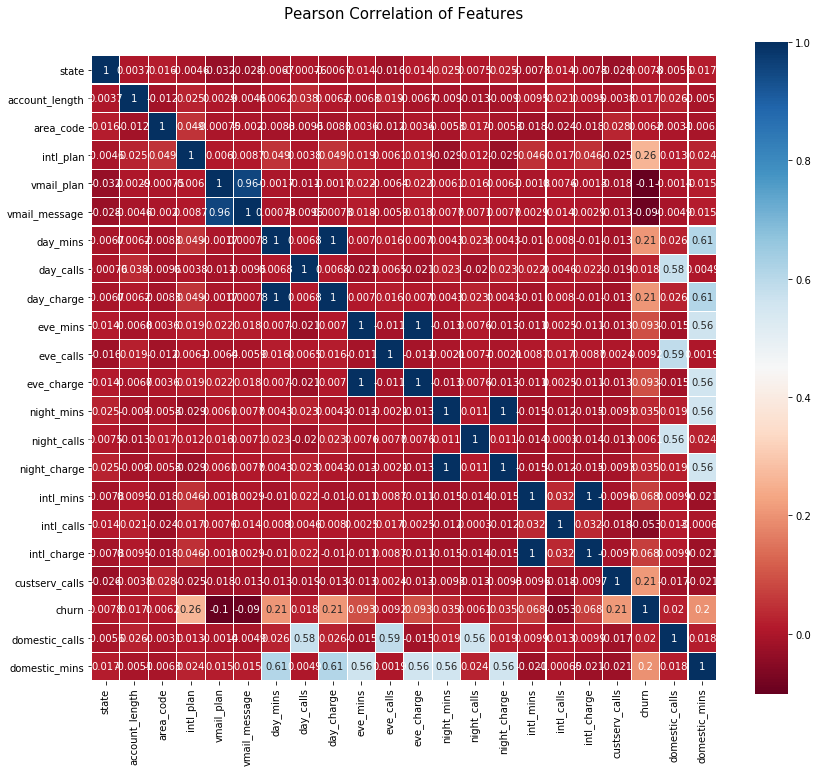

In [7]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(churn.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

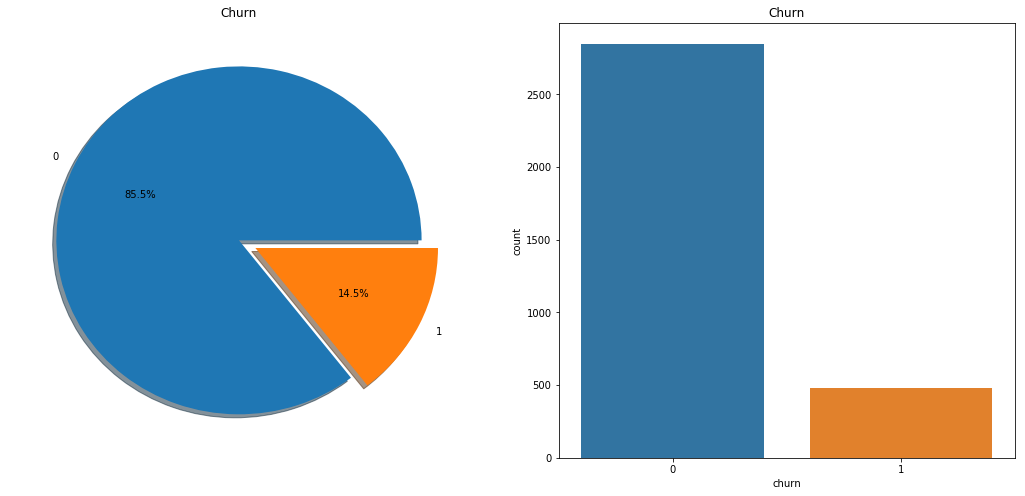

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn['churn'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Churn')
ax[0].set_ylabel('')
sns.countplot('churn',data=churn,ax=ax[1])
ax[1].set_title('Churn')
plt.show()

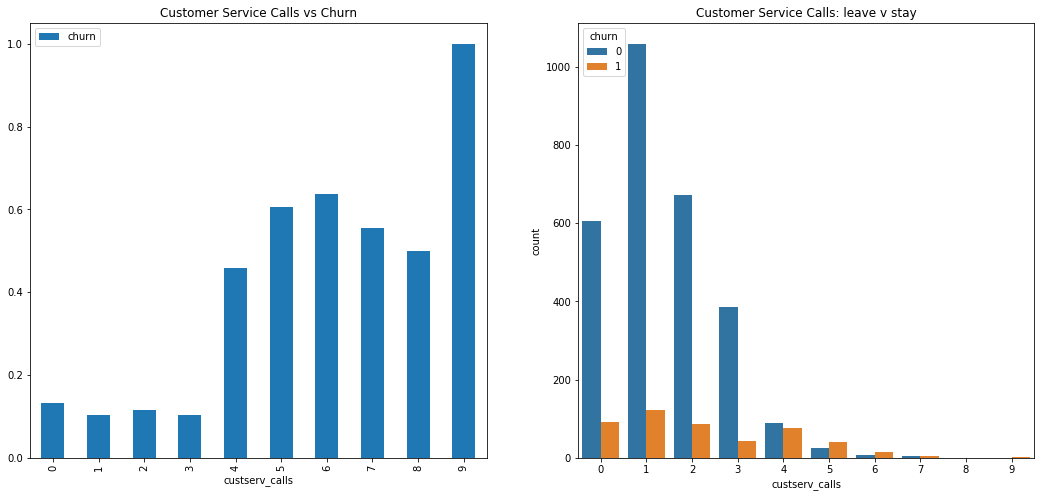

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn[['custserv_calls','churn']].groupby(['custserv_calls']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Customer Service Calls vs Churn')
sns.countplot('custserv_calls',hue='churn',data=churn,ax=ax[1])
ax[1].set_title('Customer Service Calls: leave v stay')
plt.show()

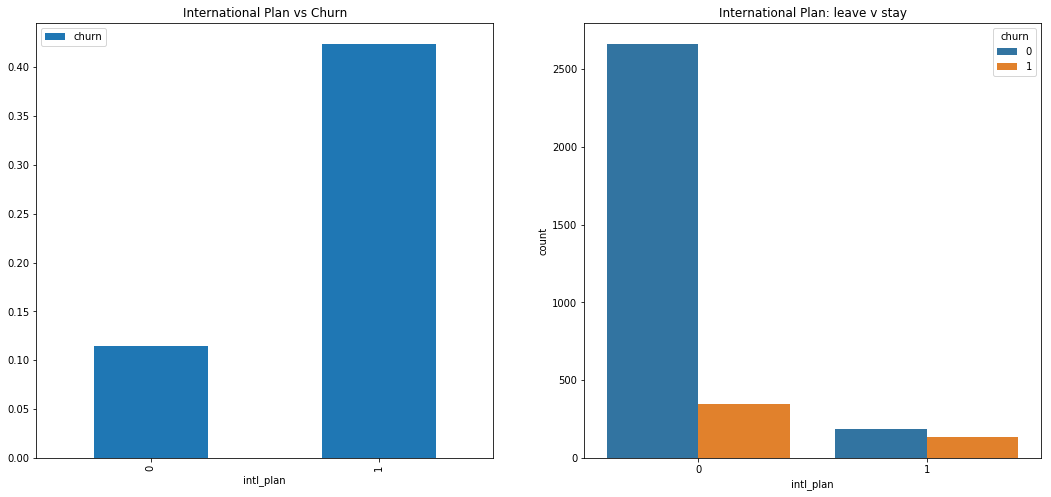

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn[['intl_plan','churn']].groupby(['intl_plan']).mean().plot.bar(ax=ax[0])
ax[0].set_title('International Plan vs Churn')
sns.countplot('intl_plan',hue='churn',data=churn,ax=ax[1])
ax[1].set_title('International Plan: leave v stay')
plt.show()

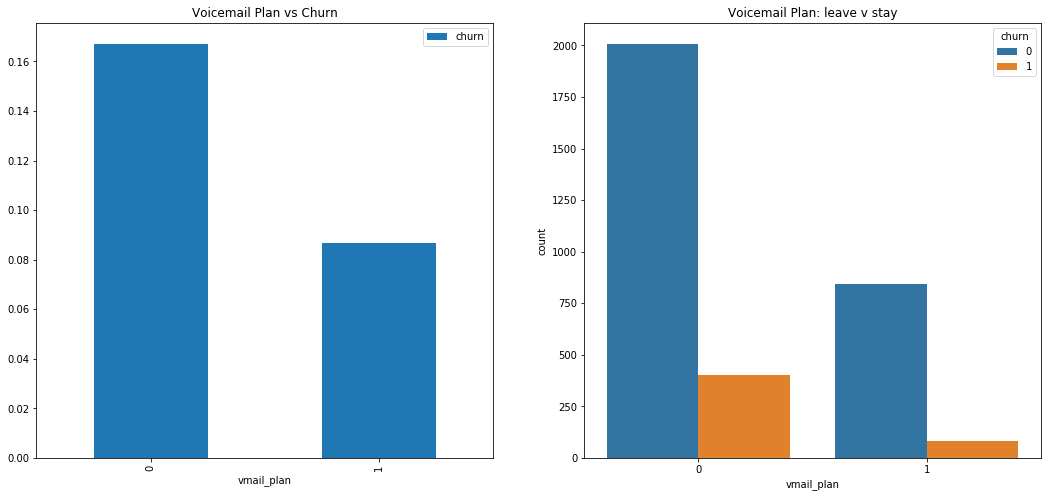

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
churn[['vmail_plan','churn']].groupby(['vmail_plan']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Voicemail Plan vs Churn')
sns.countplot('vmail_plan',hue='churn',data=churn,ax=ax[1])
ax[1].set_title('Voicemail Plan: leave v stay')
plt.show()

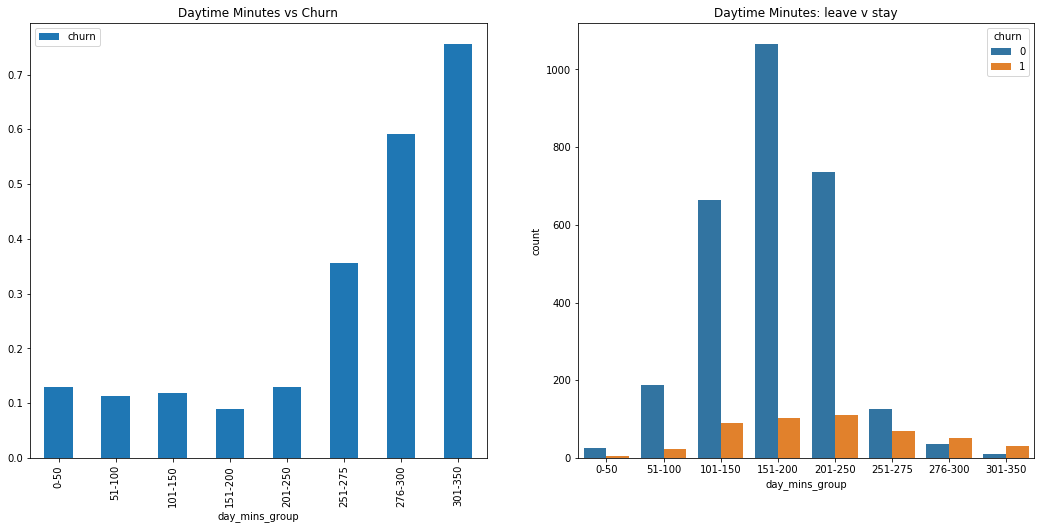

In [13]:
bins = [0,51,101,151,201,251,276,301,351]
bin_labels = ['0-50','51-100', '101-150','151-200','201-250','251-275','276-300','301-350']
churn['day_mins_group'] = pd.cut(churn.day_mins, bins, right=False, labels = bin_labels)

f,ax=plt.subplots(1,2,figsize=(18,8))
churn[['day_mins_group','churn']].groupby(['day_mins_group']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Daytime Minutes vs Churn')
sns.countplot('day_mins_group',hue='churn',data=churn,ax=ax[1])
ax[1].set_title('Daytime Minutes: leave v stay')
plt.show()

#replace day_mins w/ day_mins_group?
#no, accuracy score decreases

#### Decision Tree

In [43]:
X = churn[['intl_plan','vmail_plan','custserv_calls','day_mins','eve_mins','night_mins','intl_mins','intl_calls','domestic_calls']]
Y = churn['churn']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.3)

dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_Train,Y_Train)
predictions = dtree.predict(X_Test)
print(classification_report(Y_Test,predictions))
print(confusion_matrix(Y_Test,predictions))
print(accuracy_score(Y_Test,predictions))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95       865
          1       0.90      0.41      0.56       135

avg / total       0.91      0.91      0.90      1000

[[859   6]
 [ 80  55]]
0.914


In [44]:
scores = cross_val_score(dtree, X, Y, cv=3)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.89828983 0.89828983 0.90549055]
Accuracy: 0.90 (+/- 0.01)


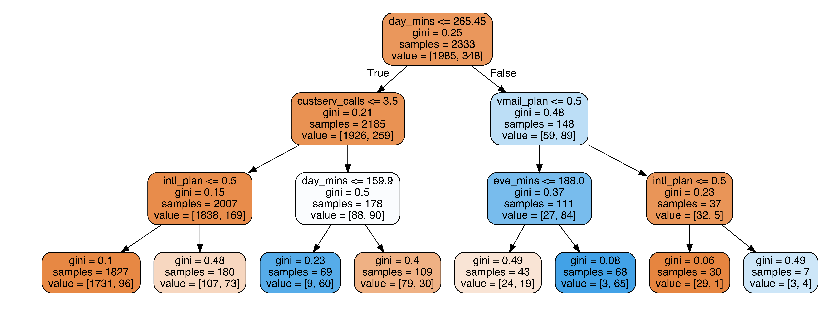

In [46]:
# Visualizing the Decision Tree
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtree, out_file='tree.dot', 
                feature_names = X.columns,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();


#### Random Forest

In [321]:
random_forest = RandomForestClassifier(n_estimators=300)

random_forest.fit(X_Train, Y_Train)

Y_pred = random_forest.predict(X_Test)

print(accuracy_score(Y_Test, Y_pred))
print(recall_score(Y_Test,Y_pred))
print(classification_report(Y_Test,predictions))
print(confusion_matrix(Y_Test,predictions))

0.954
0.7753623188405797
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       862
           1       0.69      0.78      0.73       138

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.83      0.86      0.84      1000
weighted avg       0.93      0.92      0.92      1000

[[814  48]
 [ 30 108]]


In [334]:
scores = cross_val_score(random_forest, X, Y, cv=3)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) #v

[0.94689469 0.95949595 0.94959496]
Accuracy: 0.95 (+/- 0.01)


### Logistic Regression

In [315]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_Train,Y_Train)

#
y_pred=logreg.predict(X_Test)
print(accuracy_score(Y_Test,y_pred))
print(recall_score(Y_Test,Y_pred))
print(classification_report(Y_Test,predictions))
print(confusion_matrix(Y_Test,predictions))


0.869
0.2753623188405797
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       862
           1       0.68      0.75      0.71       138

   micro avg       0.92      0.92      0.92      1000
   macro avg       0.82      0.85      0.83      1000
weighted avg       0.92      0.92      0.92      1000

[[812  50]
 [ 34 104]]


/Users/enzo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [329]:
scores = cross_val_score(logreg, X, Y, cv=3)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.86318632 0.86048605 0.86138614]
Accuracy: 0.86 (+/- 0.00)


/Users/enzo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/enzo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/enzo/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Gaussian Naive Bayes

In [325]:
model = GaussianNB()
model.fit(X_Train, Y_Train)
y_pred = model.predict(X_Test)
print(classification_report(Y_Test, y_pred))
accuracy_score(Y_Test, y_pred)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       862
           1       0.44      0.42      0.43       138

   micro avg       0.85      0.85      0.85      1000
   macro avg       0.67      0.67      0.67      1000
weighted avg       0.84      0.85      0.84      1000



0.846

In [330]:
scores = cross_val_score(model, X, Y, cv=3)
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.85148515 0.84968497 0.84968497]
Accuracy: 0.85 (+/- 0.00)
